In [15]:
import numpy as np # linear algebra
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import make_scorer,accuracy_score,precision_score,recall_score,f1_score

## Exploring the Dataset

In [16]:
sns.set(style='darkgrid',color_codes=True)
%matplotlib inline

In [17]:
eeg_data = pd.read_csv('Dataset/EEG_data.csv')
info_data=pd.read_csv('Dataset/demographic_info.csv')
eeg_data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0,0.0


In [18]:
info_data

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M
5,5,24,Han Chinese,M
6,6,24,Han Chinese,M
7,7,25,Han Chinese,M
8,8,25,Han Chinese,M
9,9,24,Han Chinese,F


In [19]:
info_data.rename(columns={'subject ID':'SubjectID'},inplace=True)

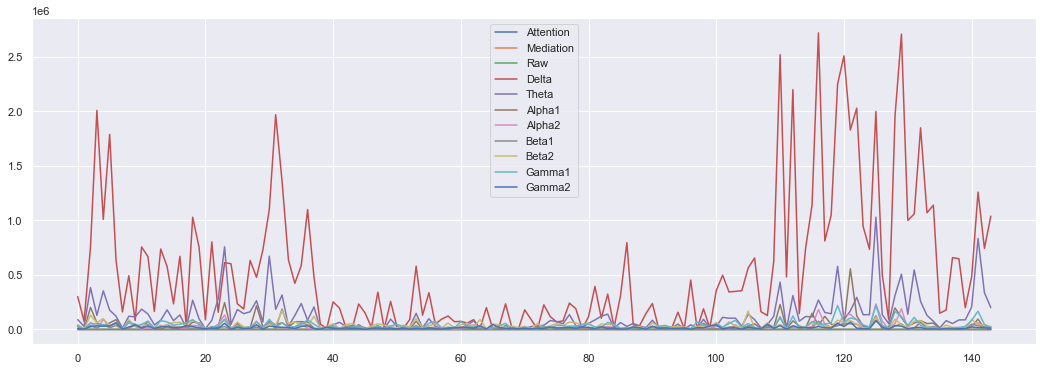

In [20]:
data_user1_video1 = eeg_data.query('SubjectID==0 & VideoID==0')
features = ['Attention', 'Mediation', 'Raw', 'Delta',
            'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2']
data_user1_video1[features].plot(figsize=(18,6))
plt.show()

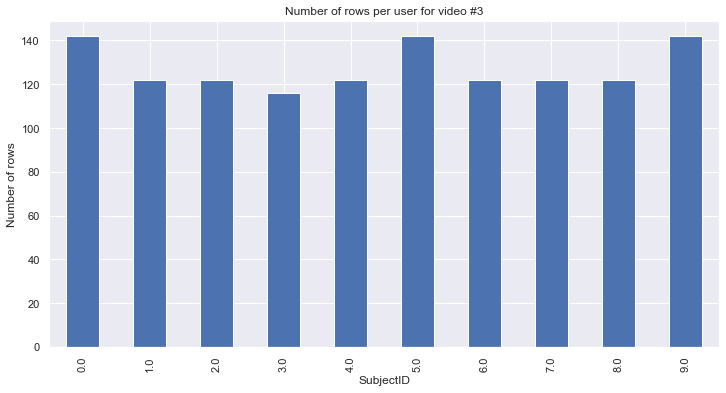

In [21]:
eeg_data.groupby(['SubjectID', 'VideoID']).size().loc[(slice(None), 2)].plot(kind='bar', figsize=(12,6))
plt.title("Number of rows per user for video #3")
plt.ylabel("Number of rows")
plt.show()

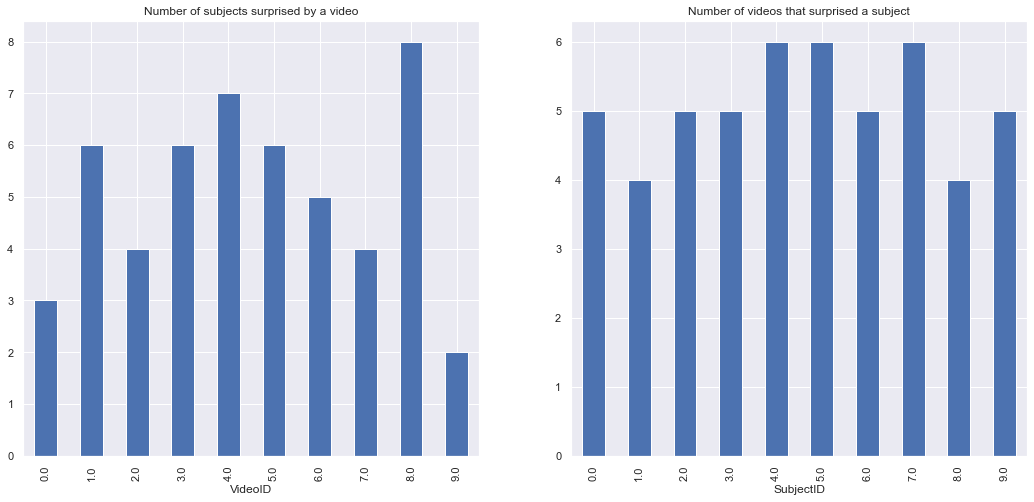

In [22]:
data_resume = eeg_data.groupby(['SubjectID', 'VideoID'])['user-definedlabeln'].agg(lambda x: sum(x) > 0).unstack("VideoID")
fig = plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
data_resume.apply(sum).plot(kind='bar', title='Number of subjects surprised by a video')
plt.subplot(1, 2, 2)
data_resume.apply(sum, axis=1).plot(kind='bar', title="Number of videos that surprised a subject")
plt.show()

In [23]:
info_data=info_data.merge(eeg_data,on='SubjectID')

In [24]:
info_data.head()

,SubjectID,age,ethnicity,gender,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0,25,Han Chinese,M,0.0,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0,0.0
1,0,25,Han Chinese,M,0.0,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0,0.0
2,0,25,Han Chinese,M,0.0,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0,0.0
3,0,25,Han Chinese,M,0.0,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0,0.0
4,0,25,Han Chinese,M,0.0,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0,0.0


In [25]:
info_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  int64  
 1    age                12811 non-null  int64  
 2    ethnicity          12811 non-null  object 
 3    gender             12811 non-null  object 
 4   VideoID             12811 non-null  float64
 5   Attention           12811 non-null  float64
 6   Mediation           12811 non-null  float64
 7   Raw                 12811 non-null  float64
 8   Delta               12811 non-null  float64
 9   Theta               12811 non-null  float64
 10  Alpha1              12811 non-null  float64
 11  Alpha2              12811 non-null  float64
 12  Beta1               12811 non-null  float64
 13  Beta2               12811 non-null  float64
 14  Gamma1              12811 non-null  float64
 15  Gamma2              12811 non-null  float64
 16  pred

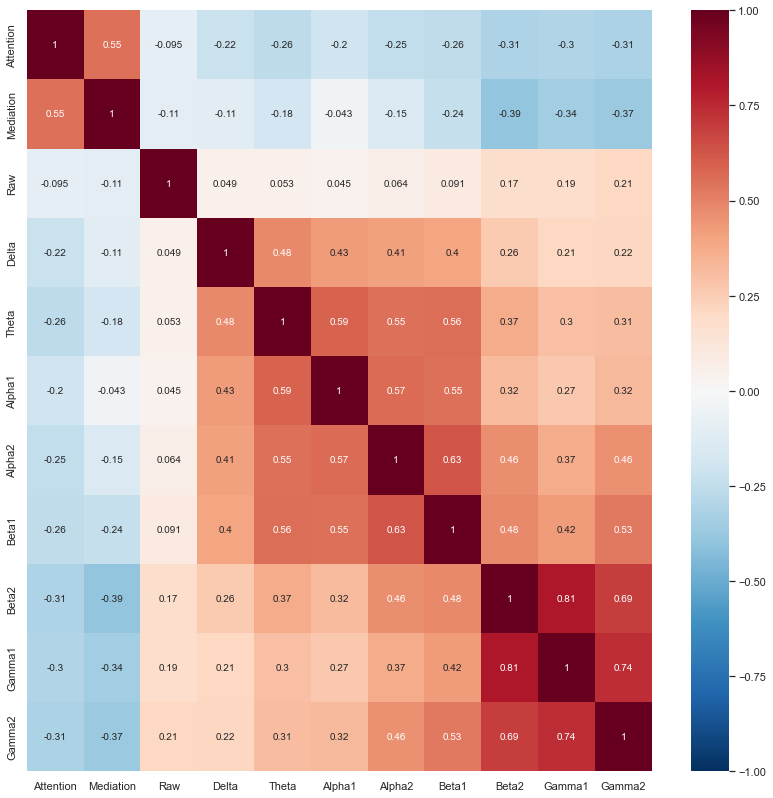

In [26]:
import seaborn as sns
corr = info_data[features].corr()
plt.figure(figsize = (14, 14))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, cmap="RdBu_r")
plt.show()

In [27]:
info_data[features]

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2
0,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0
1,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0
2,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0
3,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0
4,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0
...,...,...,...,...,...,...,...,...,...,...,...
12806,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0
12807,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0
12808,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0
12809,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0


In [28]:
data=info_data.drop(['SubjectID','VideoID','predefinedlabel'],axis=1)

In [29]:
data.columns

Index([' age', ' ethnicity', ' gender', 'Attention', 'Mediation', 'Raw',
       'Delta', 'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1',
       'Gamma2', 'user-definedlabeln'],
      dtype='object')

In [30]:
data

,age,ethnicity,gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,25,Han Chinese,M,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0.0
1,25,Han Chinese,M,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0.0
2,25,Han Chinese,M,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0.0
3,25,Han Chinese,M,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0.0
4,25,Han Chinese,M,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,Han Chinese,F,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0,0.0
12807,24,Han Chinese,F,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0,0.0
12808,24,Han Chinese,F,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0,0.0
12809,24,Han Chinese,F,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0,0.0


In [31]:
data=data.rename(columns={' age':'Age',' ethnicity':'Ethnicity',' gender':'Gender','user-definedlabeln':'Label'})
data['Label']=data['Label'].astype(np.int)
data

,Age,Ethnicity,Gender,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Label
0,25,Han Chinese,M,56.0,43.0,278.0,302000.0,90600.0,33700.0,24000.0,27900.0,45100.0,33200.0,8290.0,0
1,25,Han Chinese,M,40.0,35.0,-50.0,73800.0,28100.0,1440.0,2240.0,2750.0,3690.0,5290.0,2740.0,0
2,25,Han Chinese,M,47.0,48.0,101.0,758000.0,384000.0,202000.0,62100.0,36300.0,131000.0,57200.0,25400.0,0
3,25,Han Chinese,M,47.0,57.0,-5.0,2010000.0,129000.0,61200.0,17100.0,11500.0,62500.0,50000.0,33900.0,0
4,25,Han Chinese,M,44.0,53.0,-8.0,1010000.0,354000.0,37100.0,88900.0,45300.0,99600.0,44800.0,29700.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,Han Chinese,F,64.0,38.0,-39.0,128000.0,9950.0,709.0,21700.0,3870.0,39700.0,2600.0,960.0,0
12807,24,Han Chinese,F,61.0,35.0,-275.0,323000.0,797000.0,153000.0,146000.0,39800.0,571000.0,36600.0,10000.0,0
12808,24,Han Chinese,F,60.0,29.0,-426.0,681000.0,154000.0,40100.0,39100.0,11000.0,27000.0,20400.0,2020.0,0
12809,24,Han Chinese,F,60.0,29.0,-84.0,366000.0,27300.0,11400.0,9930.0,1940.0,3280.0,12300.0,1760.0,0


In [32]:
data.to_csv('Dataset/final_data.csv')


In [33]:
print('Missing Values:',data.isna().sum().sum())

Missing Values: 0


In [34]:
data['Gender'].unique()

array(['M', 'F'], dtype=object)

In [35]:
data['Ethnicity'].unique()

array(['Han Chinese', 'English', 'Bengali'], dtype=object)

In [36]:
data["Gender"]=data["Gender"].apply(lambda x:1 if x=='M' else 0)

In [37]:
data['Age'].unique()

array([25, 24, 31, 28], dtype=int64)

In [38]:
type(data)

pandas.core.frame.DataFrame

In [39]:
input_cols = ['Age','Gender','Ethnicity',
              'Attention','Mediation','Raw','Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2']
target_col = 'Label'

In [40]:
inputs = data[input_cols].copy()
targets = data[target_col].copy()

In [41]:
numeric_cols = ['Attention','Mediation','Raw','Delta','Theta','Alpha1','Alpha2','Beta1','Beta2','Gamma1','Gamma2' ]
categorical_cols = ['Age','Gender','Ethnicity']

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [44]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [47]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])

In [48]:
inputs

,Age,Gender,Ethnicity,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,...,Gamma2,Age_24,Age_25,Age_28,Age_31,Gender_0,Gender_1,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese
0,25,1,Han Chinese,0.56,0.43,0.567805,0.076158,0.030094,0.024597,0.023527,...,0.006139,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,25,1,Han Chinese,0.40,0.35,0.487805,0.018525,0.009330,0.001050,0.002194,...,0.002028,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,25,1,Han Chinese,0.47,0.48,0.524634,0.191323,0.127570,0.147444,0.060881,...,0.018813,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,25,1,Han Chinese,0.47,0.57,0.498780,0.507520,0.042852,0.044670,0.016763,...,0.025110,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,25,1,Han Chinese,0.44,0.53,0.498049,0.254966,0.117603,0.027079,0.087155,...,0.021999,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,24,0,Han Chinese,0.64,0.38,0.490488,0.032214,0.003300,0.000516,0.021273,...,0.000710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12807,24,0,Han Chinese,0.61,0.35,0.432927,0.081462,0.264780,0.111678,0.143136,...,0.007406,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12808,24,0,Han Chinese,0.60,0.29,0.396098,0.171876,0.051157,0.029269,0.038331,...,0.001495,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12809,24,0,Han Chinese,0.60,0.29,0.479512,0.092322,0.009064,0.008320,0.009733,...,0.001302,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [49]:
encoded_cols

['Age_24',
 'Age_25',
 'Age_28',
 'Age_31',
 'Gender_0',
 'Gender_1',
 'Ethnicity_Bengali',
 'Ethnicity_English',
 'Ethnicity_Han Chinese']

In [50]:
numeric_cols

['Attention',
 'Mediation',
 'Raw',
 'Delta',
 'Theta',
 'Alpha1',
 'Alpha2',
 'Beta1',
 'Beta2',
 'Gamma1',
 'Gamma2']

In [51]:
X = inputs[numeric_cols + encoded_cols]

In [52]:
X

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Age_24,Age_25,Age_28,Age_31,Gender_0,Gender_1,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese
0,0.56,0.43,0.567805,0.076158,0.030094,0.024597,0.023527,0.026072,0.027332,0.016852,0.006139,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.40,0.35,0.487805,0.018525,0.009330,0.001050,0.002194,0.002567,0.002235,0.002685,0.002028,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.47,0.48,0.524634,0.191323,0.127570,0.147444,0.060881,0.033923,0.079393,0.029035,0.018813,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.47,0.57,0.498780,0.507520,0.042852,0.044670,0.016763,0.010745,0.037878,0.025380,0.025110,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.44,0.53,0.498049,0.254966,0.117603,0.027079,0.087155,0.042334,0.060362,0.022741,0.021999,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,0.64,0.38,0.490488,0.032214,0.003300,0.000516,0.021273,0.003614,0.024059,0.001319,0.000710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12807,0.61,0.35,0.432927,0.081462,0.264780,0.111678,0.143136,0.037194,0.346060,0.018578,0.007406,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12808,0.60,0.29,0.396098,0.171876,0.051157,0.029269,0.038331,0.010278,0.016362,0.010355,0.001495,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12809,0.60,0.29,0.479512,0.092322,0.009064,0.008320,0.009733,0.001810,0.001987,0.006243,0.001302,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [53]:
import numpy as np # linear algebra

In [54]:
X_train_val,X_test,Y_train_val,Y_test = train_test_split(X,targets,test_size=0.2,random_state=123)
X_train, X_val, train_targets, val_targets = train_test_split(X_train_val,Y_train_val, test_size=0.25,random_state=123)

# **MACHINE LEARNING ALGORITHMS

### 1) XG boost classifier

In [55]:
from xgboost import XGBClassifier
model = XGBClassifier(n_jobs=-1, n_estimators=20, max_depth=4,random_state=42).fit(X_train, train_targets)

In [56]:
# %%time
# model.fit(X_train, train_targets)

#### ->Feature importance

In [57]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [58]:
importance_df.head(10)

,feature,importance
19,Ethnicity_Han Chinese,0.129478
4,Theta,0.105263
14,Age_31,0.092545
3,Delta,0.081219
9,Gamma1,0.072367
0,Attention,0.067831
11,Age_24,0.059634
15,Gender_0,0.056131
10,Gamma2,0.052673
2,Raw,0.048786


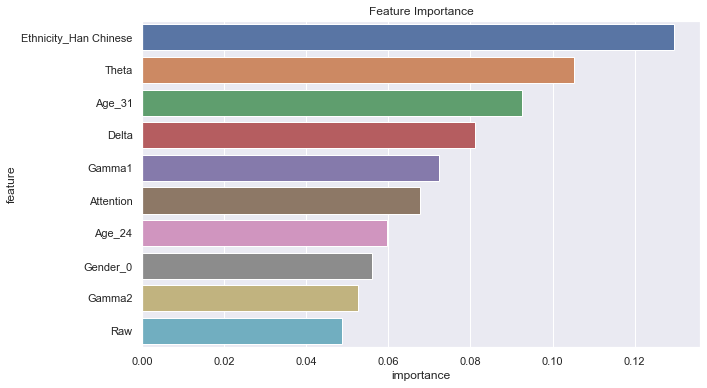

In [59]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [60]:
from sklearn.metrics import mean_squared_error

def rmse(a, b):
    return mean_squared_error(a, b, squared=False)

In [61]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)
print("RMSE of training  : ",rmse(train_preds, train_targets)," Accuracy of Testing: ",accuracy_score(train_targets,train_preds))
print("RMSE of Validation: ",rmse(val_preds, val_targets)," Accuracy of validation: ",accuracy_score(val_targets,val_preds))
print("RMSE of Testing   : ",rmse(test_preds, Y_test)," Accuracy of Testing: ",accuracy_score(Y_test,test_preds))

RMSE of training  :  0.5390067097459771  Accuracy of Testing:  0.7094717668488161
RMSE of Validation:  0.5830684131343455  Accuracy of validation:  0.660031225604996
RMSE of Testing   :  0.5785878917656798  Accuracy of Testing:  0.6652360515021459


#### ->Applying K-fold

In [62]:
from sklearn.model_selection import KFold

In [63]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = XGBClassifier(random_state=42, n_jobs=-1, **params)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse

In [64]:
kfold = KFold(n_splits=5)

In [65]:
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=8, 
                                                     n_estimators=50)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 0.21047880436807012, Validation RMSE: 0.7105470407733575
Train RMSE: 0.2533799232398346, Validation RMSE: 0.717789998840606
Train RMSE: 0.2331239274250957, Validation RMSE: 0.667934002264994
Train RMSE: 0.23706666770566256, Validation RMSE: 0.6906309552252771
Train RMSE: 0.2661506699962039, Validation RMSE: 0.6591101800975286


#### ->Taking average of all the models of k-fold

In [66]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)

In [67]:
preds = predict_avg(models, X_train)

In [68]:
train_preds = predict_avg(models, X_train)
val_preds =predict_avg(models,X_val)
test_preds = predict_avg(models, X_test)
print("RMSE of training  : ",rmse(train_preds, train_targets)," Accuracy of Testing: ",accuracy_score(train_targets,train_preds.round()))
print("RMSE of Validation: ",rmse(val_preds, val_targets)," Accuracy of validation: ",accuracy_score(val_targets,val_preds.round()))
print("RMSE of Testing   : ",rmse(test_preds, Y_test)," Accuracy of Testing: ",accuracy_score(Y_test,test_preds.round()))

RMSE of training  :  0.2368113542963277  Accuracy of Testing:  0.9435066835788858
RMSE of Validation:  0.1962171525636517  Accuracy of validation:  0.9699453551912568
RMSE of Testing   :  0.2295392252972431  Accuracy of Testing:  0.9504486929379633


In [69]:
gbAccuracy=accuracy_score(Y_test,test_preds.round())
gbPrecision=precision_score(Y_test,test_preds.round(), average='binary')
gbF1_score=f1_score(Y_test,test_preds.round(), average='binary')
gbRecall=recall_score(Y_test, test_preds.round(), average='binary')


print("Trainig Accuracy: %.5f" %accuracy_score(train_targets,train_preds.round()))
print("Test Accuracy: %.5f" %accuracy_score(Y_test, test_preds.round()))

Trainig Accuracy: 0.94351
Test Accuracy: 0.95045


### 2) Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [91]:
%%time
model.fit(X_train, train_targets)

Wall time: 117 ms


DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [92]:
model.score(X_train, train_targets)

0.7285588837935408

In [93]:
train_preds = model.predict(X_train)
val_preds = model.predict(X_val)
test_preds = model.predict(X_test)
print("Accuracy score of training: ",accuracy_score(train_targets, train_preds))

print("Accuracy score of Validation: ",accuracy_score(val_targets,val_preds))
print("Accuracy score of testing: ",accuracy_score(Y_test,test_preds))

Accuracy score of training:  0.7285588837935408
Accuracy score of Validation:  0.546448087431694
Accuracy score of testing:  0.6902067889192353


In [94]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_leaf_nodes=500,max_depth=md, random_state=42).fit(X_train, train_targets)
    train_acc = 1 - model.score(X_train, train_targets)
    val_acc = 1 - model.score(X_val, val_targets)
    test_acc = 1 - model.score(X_test, Y_test)
    return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc,'Testing Error':test_acc}

In [95]:
%%time
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

Wall time: 1.88 s


In [96]:
errors_df

,Max Depth,Training Error,Validation Error,Testing Error
0,1,0.418480,0.434817,0.426453
1,2,0.402673,0.460578,0.417089
2,3,0.378183,0.460968,0.387437
3,4,0.351156,0.437549,0.364417
4,5,0.337887,0.462139,0.359735
5,6,0.316616,0.469555,0.341787
6,7,0.297785,0.459407,0.316426
7,8,0.273393,0.447307,0.311354
8,9,0.242365,0.444965,0.277019
9,10,0.213777,0.457455,0.255560


In [97]:
model = DecisionTreeClassifier(max_leaf_nodes=500,max_depth=11, random_state=42).fit(X_train.values, train_targets)
print("accuracy of Training dataset: ",model.score(X_train, train_targets))
print("accuracy of validation dataset: ",model.score(X_val, val_targets))
print("accuracy of Testing dataset: ",model.score(X_test, Y_test))

accuracy of Training dataset:  0.8100302468533516
accuracy of validation dataset:  0.5530835284933645
accuracy of Testing dataset:  0.7662895044869293


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [98]:
X

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Age_24,Age_25,Age_28,Age_31,Gender_0,Gender_1,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese
0,0.56,0.43,0.567805,0.076158,0.030094,0.024597,0.023527,0.026072,0.027332,0.016852,0.006139,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.40,0.35,0.487805,0.018525,0.009330,0.001050,0.002194,0.002567,0.002235,0.002685,0.002028,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.47,0.48,0.524634,0.191323,0.127570,0.147444,0.060881,0.033923,0.079393,0.029035,0.018813,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.47,0.57,0.498780,0.507520,0.042852,0.044670,0.016763,0.010745,0.037878,0.025380,0.025110,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.44,0.53,0.498049,0.254966,0.117603,0.027079,0.087155,0.042334,0.060362,0.022741,0.021999,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,0.64,0.38,0.490488,0.032214,0.003300,0.000516,0.021273,0.003614,0.024059,0.001319,0.000710,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12807,0.61,0.35,0.432927,0.081462,0.264780,0.111678,0.143136,0.037194,0.346060,0.018578,0.007406,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12808,0.60,0.29,0.396098,0.171876,0.051157,0.029269,0.038331,0.010278,0.016362,0.010355,0.001495,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
12809,0.60,0.29,0.479512,0.092322,0.009064,0.008320,0.009733,0.001810,0.001987,0.006243,0.001302,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [99]:
targets

0        0
1        0
2        0
3        0
4        0
        ..
12806    0
12807    0
12808    0
12809    0
12810    0
Name: Label, Length: 12811, dtype: int32

In [100]:
X_test

,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Age_24,Age_25,Age_28,Age_31,Gender_0,Gender_1,Ethnicity_Bengali,Ethnicity_English,Ethnicity_Han Chinese
6426,0.10,0.53,0.503171,0.386294,0.100327,0.030437,0.031959,0.017100,0.005314,0.001527,0.002465,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2907,1.00,0.23,0.511707,0.004231,0.005144,0.000801,0.002665,0.007306,0.010059,0.000837,0.001576,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4346,0.00,0.00,0.520000,0.008777,0.002732,0.001166,0.000960,0.000807,0.011999,0.000195,0.000086,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3684,0.54,0.57,0.508293,0.002614,0.001675,0.005072,0.013527,0.008717,0.003017,0.002497,0.001747,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
842,0.10,0.13,0.510732,0.093079,0.544848,0.034378,0.016567,0.046259,0.030120,0.018781,0.025924,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6574,0.48,0.24,0.516341,0.062268,0.019330,0.002188,0.006978,0.006754,0.004290,0.002944,0.000671,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5445,0.11,0.48,0.545610,0.333258,0.083051,0.026714,0.045586,0.032334,0.007999,0.005583,0.003761,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2846,0.70,0.53,0.507805,0.002564,0.003782,0.002984,0.003665,0.007876,0.007272,0.000888,0.000924,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
978,0.57,0.63,0.508537,0.037770,0.002144,0.004911,0.003449,0.001306,0.008120,0.003573,0.000976,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [101]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = DecisionTreeClassifier(max_leaf_nodes=500,max_depth=11, random_state=42)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse
kfold = KFold(n_splits=5)
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=8, 
                                                     n_estimators=50)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)
train_preds = predict_avg(models, X_train)
val_preds =predict_avg(models,X_val)
test_preds = predict_avg(models, X_test)
print("RMSE of training  : ",rmse(train_preds, train_targets)," Accuracy of Testing: ",accuracy_score(train_targets,train_preds.round()))
print("RMSE of Validation: ",rmse(val_preds, val_targets)," Accuracy of validation: ",accuracy_score(val_targets,val_preds.round()))
print("RMSE of Testing   : ",rmse(test_preds, Y_test)," Accuracy of Testing: ",accuracy_score(Y_test,test_preds.round()))

Train RMSE: 0.4368827194323915, Validation RMSE: 0.6933157255384952
Train RMSE: 0.45448513423725734, Validation RMSE: 0.7026769378603375
Train RMSE: 0.45006260337944, Validation RMSE: 0.6579247291737801
Train RMSE: 0.449737296070308, Validation RMSE: 0.6823868657178958
Train RMSE: 0.43585519745283346, Validation RMSE: 0.6685181160646549
RMSE of training  :  0.36009885786117163  Accuracy of Testing:  0.8276905063908674
RMSE of Validation:  0.35359202819686364  Accuracy of validation:  0.836455893832943
RMSE of Testing   :  0.35904238178204506  Accuracy of Testing:  0.8275458447132267


#### Calculatinf f1-score,precision,accuracy


In [102]:
dtAccuracy=accuracy_score(Y_test,test_preds.round())
dtPrecision=precision_score(Y_test,test_preds.round(), average='binary')
dtF1_score=f1_score(Y_test,test_preds.round(), average='binary')
dtRecall=recall_score(Y_test, test_preds.round(), average='binary')


print("Trainig Accuracy: %.5f" %accuracy_score(train_targets,train_preds.round()))
print("Test Accuracy: %.5f" %accuracy_score(Y_test, test_preds.round()))

Trainig Accuracy: 0.82769
Test Accuracy: 0.82755


### 3) Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=20,
                               max_depth=15).fit(X_train, train_targets)
print("accuracy of Training dataset: ",model.score(X_train, train_targets))
print("accuracy of validation dataset: ",model.score(X_val, val_targets))

accuracy of Training dataset:  0.9557029954141868
accuracy of validation dataset:  0.5714285714285714


Applying K-FOLD

In [105]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=20,
                               max_depth=15)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse
kfold = KFold(n_splits=5)
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=8, 
                                                     n_estimators=50)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)
train_preds = predict_avg(models, X_train)
val_preds =predict_avg(models,X_val)
test_preds = predict_avg(models, X_test)
print("RMSE of training  : ",rmse(train_preds, train_targets)," Accuracy of Testing: ",accuracy_score(train_targets,train_preds.round()))
print("RMSE of Validation: ",rmse(val_preds, val_targets)," Accuracy of validation: ",accuracy_score(val_targets,val_preds.round()))
print("RMSE of Testing   : ",rmse(test_preds, Y_test)," Accuracy of Testing: ",accuracy_score(Y_test,test_preds.round()))

Train RMSE: 0.1730810931128249, Validation RMSE: 0.6950019438187365
Train RMSE: 0.21505444538409665, Validation RMSE: 0.7048953393947149
Train RMSE: 0.20025352260190007, Validation RMSE: 0.6525635510310624
Train RMSE: 0.17137304017669996, Validation RMSE: 0.6746207770430073
Train RMSE: 0.2104685358570569, Validation RMSE: 0.6546536707079771
RMSE of training  :  0.20553374753965684  Accuracy of Testing:  0.9644843399356035
RMSE of Validation:  0.18838232421876533  Accuracy of validation:  0.9718969555035128
RMSE of Testing   :  0.20420854900453903  Accuracy of Testing:  0.9644947327350761


#### Calculatinf f1-score,precision,accuracy

In [106]:
rfAccuracy=accuracy_score(Y_test,test_preds.round())
rfPrecision=precision_score(Y_test,test_preds.round(), average='binary')
rfF1_score=f1_score(Y_test,test_preds.round(), average='binary')
rfRecall=recall_score(Y_test, test_preds.round(), average='binary')


print("Trainig Accuracy: %.5f" %accuracy_score(train_targets,train_preds.round()))
print("Test Accuracy: %.5f" %accuracy_score(Y_test, test_preds.round()))

Trainig Accuracy: 0.96448
Test Accuracy: 0.96449


### 4) KNN classifier

In [107]:
from sklearn.neighbors import KNeighborsClassifier

In [108]:

K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, train_targets)
  
    training_score = clf.score(X_train, train_targets)
    test_score = clf.score(X_test,Y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [109]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.7987120694701922, 0.7573156457276629]
3 : [0.8024197482681237, 0.7604369879047991]
4 : [0.7548053468631086, 0.7249317206398751]
5 : [0.7599765830812762, 0.721810378462739]
6 : [0.7364620938628159, 0.7058134998049161]
7 : [0.7378280807883696, 0.702301989855638]
8 : [0.721436237681725, 0.7003511509949278]
9 : [0.7228997951019611, 0.6956691377292236]
10 : [0.7125573226656259, 0.6870854467420991]
11 : [0.7160698604741926, 0.6898166211470933]
12 : [0.7109961947507074, 0.6835739367928209]
13 : [0.7094350668357888, 0.6777214202106906]
14 : [0.705629817543175, 0.685524775653531]
15 : [0.7064103815006342, 0.6878657822863832]
16 : [0.6999707288515953, 0.6796722590714007]
17 : [0.6995804468728657, 0.6773312524385485]
18 : [0.696555761537711, 0.6679672259071401]
19 : [0.6930432237291443, 0.6699180647678502]
20 : [0.6935310762025564, 0.6726492391728444]


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


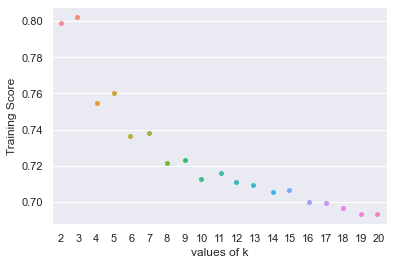

In [110]:
ax = sns.stripplot(K, training);
ax.set(xlabel ='values of k', ylabel ='Training Score')  
  
plt.show()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


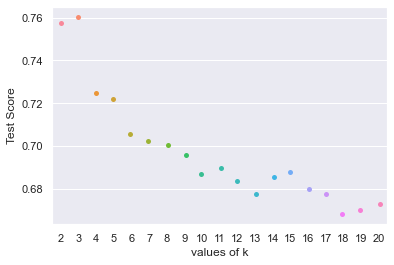

In [111]:
ax = sns.stripplot(K, test);
ax.set(xlabel ='values of k', ylabel ='Test Score')
plt.show()

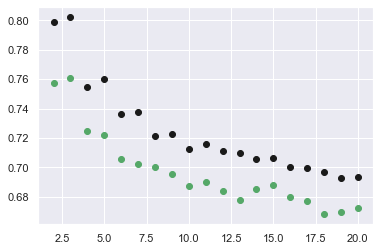

In [112]:
plt.scatter(K, training, color ='k')
plt.scatter(K, test, color ='g')
plt.show()

In [113]:
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, train_targets)
  
training_score = clf.score(X_train, train_targets)
test_score = clf.score(X_test,Y_test)

print("Training score: ",training_score)
print("Testing score: ",test_score)

Training score:  0.8024197482681237
Testing score:  0.7604369879047991


Applying K-FOLD

In [114]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = KNeighborsClassifier(n_neighbors = 3)
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse
kfold = KFold(n_splits=5)
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=8, 
                                                     n_estimators=50)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)
train_preds = predict_avg(models, X_train)
val_preds =predict_avg(models,X_val)
test_preds = predict_avg(models, X_test)
print("RMSE of training  : ",rmse(train_preds, train_targets)," Accuracy of Testing: ",accuracy_score(train_targets,train_preds.round()))
print("RMSE of Validation: ",rmse(val_preds, val_targets)," Accuracy of validation: ",accuracy_score(val_targets,val_preds.round()))
print("RMSE of Testing   : ",rmse(test_preds, Y_test)," Accuracy of Testing: ",accuracy_score(Y_test,test_preds.round()))

Train RMSE: 0.4423210726425647, Validation RMSE: 0.6805359252328851
Train RMSE: 0.4498457579785701, Validation RMSE: 0.717789998840606
Train RMSE: 0.443181007936585, Validation RMSE: 0.6798080272711059
Train RMSE: 0.4436211083508279, Validation RMSE: 0.6841006905997105
Train RMSE: 0.4445000019481173, Validation RMSE: 0.6962596624567611
RMSE of training  :  0.4221776569718588  Accuracy of Testing:  0.7968582300712265
RMSE of Validation:  0.4062355503945606  Accuracy of validation:  0.812256049960968
RMSE of Testing   :  0.4113679206421393  Accuracy of Testing:  0.8095981271946937


#### Calcualtin gf1-score,accuracy,precision

In [115]:
KnAccuracy=accuracy_score(Y_test,test_preds.round())
KnPrecision=precision_score(Y_test,test_preds.round(), average='binary')
KnF1_score=f1_score(Y_test,test_preds.round(), average='binary')
KnRecall=recall_score(Y_test, test_preds.round(), average='binary')


print("Trainig Accuracy: %.5f" %accuracy_score(train_targets,train_preds.round()))
print("Test Accuracy: %.5f" %accuracy_score(Y_test, test_preds.round()))

Trainig Accuracy: 0.79686
Test Accuracy: 0.80960


### 5)Naive Bayes

In [116]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, train_targets)  

GaussianNB()

In [117]:
# Predicting the Test set results  
y_pred = classifier.predict(X_test)  

In [118]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(Y_test, y_pred)  

In [119]:
cm

array([[1052,  200],
       [ 901,  410]], dtype=int64)

In [120]:
accuracy_score(Y_test,y_pred)

0.5704252828716349

Applying K-FOLD

In [121]:
def train_and_evaluate(X_train, train_targets, X_val, val_targets, **params):
    model = GaussianNB()
    model.fit(X_train, train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse
kfold = KFold(n_splits=5)
models = []

for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse, val_rmse = train_and_evaluate(X_train, 
                                                     train_targets, 
                                                     X_val, 
                                                     val_targets, 
                                                     max_depth=8, 
                                                     n_estimators=50)
    models.append(model)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))
def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)
train_preds = predict_avg(models, X_train)
val_preds =predict_avg(models,X_val)
test_preds = predict_avg(models, X_test)
print("RMSE of training  : ",rmse(train_preds, train_targets)," Accuracy of Testing: ",accuracy_score(train_targets,train_preds.round()))
print("RMSE of Validation: ",rmse(val_preds, val_targets)," Accuracy of validation: ",accuracy_score(val_targets,val_preds.round()))
print("RMSE of Testing   : ",rmse(test_preds, Y_test)," Accuracy of Testing: ",accuracy_score(Y_test,test_preds.round()))

Train RMSE: 0.6691017199436404, Validation RMSE: 0.6509394753325649
Train RMSE: 0.6945419538874706, Validation RMSE: 0.7172460124048755
Train RMSE: 0.6655599491091185, Validation RMSE: 0.7384288234111264
Train RMSE: 0.6666585357425259, Validation RMSE: 0.6984984452838907
Train RMSE: 0.6630630807388771, Validation RMSE: 0.6450435540124324
RMSE of training  :  0.5753277752554524  Accuracy of Testing:  0.5486388915991804
RMSE of Validation:  0.5475515011120173  Accuracy of validation:  0.5858704137392662
RMSE of Testing   :  0.5669255718167168  Accuracy of Testing:  0.5595005852516582


#### Calcualtin gf1-score,accuracy,precision

In [122]:

nbAccuracy=accuracy_score(Y_test,test_preds.round())
nbPrecision=precision_score(Y_test,test_preds.round(), average='binary')
nbF1_score=f1_score(Y_test,test_preds.round(), average='binary')
nbRecall=recall_score(Y_test, test_preds.round(), average='binary')

print("Trainig Accuracy: %.5f" %accuracy_score(train_targets,train_preds.round()))
print("Test Accuracy: %.5f" %accuracy_score(Y_test, test_preds.round()))

Trainig Accuracy: 0.54864
Test Accuracy: 0.55950


# Performance Evaluation

In [123]:
models_scores_table = pd.DataFrame({'XG boost classifier':[gbAccuracy,gbPrecision,gbF1_score,gbRecall],
                                       
                                      'Decision Tree Classifier':[dtAccuracy,dtPrecision,dtF1_score,dtRecall],
                                       
                                                              
                                      'Random Forest':[rfAccuracy,rfPrecision,rfF1_score,rfRecall],                                       
                                                                            
                                      ' KNN classifier':[KnAccuracy,KnPrecision,KnF1_score,KnRecall],
                                    
                                      ' Naive bayes classifier':[nbAccuracy,nbPrecision,nbF1_score,nbRecall],
                                   },
                                       
                                      
                                      index=['Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)

table=models_scores_table.style.set_properties(**{'background-color': 'pink', 'color':'black', 'border':'1.3px solid black'}).set_caption("RESULTS") 
headers={'selector':'th:not(.index_name)','props':'color: darkblue;'}
table.set_table_styles([headers])
table

,XG boost classifier,Decision Tree Classifier,Random Forest,KNN classifier,Naive bayes classifier,Best Score
Accuracy,0.950449,0.827546,0.964495,0.809598,0.559501,Random Forest
Precision,0.945783,0.827430,0.959337,0.812928,0.671053,Random Forest
Recall,0.951876,0.832449,0.965517,0.814166,0.387412,Random Forest
F1 Score,0.958047,0.837529,0.971777,0.815408,0.272311,Random Forest
